In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

In [160]:
import os
path =str(os.getcwd()).replace('\\','/')

In [3]:
now = datetime.now()  # datetime是以毫秒存储日期和时间
now

datetime.datetime(2020, 6, 14, 20, 51, 0, 947750)

In [4]:
print(now.year,now.month,now.day)

2020 6 14


In [5]:
# datetime.timedelta表示两个datetime对象之间的时间差
delta = datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(926, 56700)

In [6]:
print(delta.days,delta.seconds)

926 56700


In [7]:
# 给datetime对象加上（或减去）一个或多个timedelta，这样会产生一个新对象
from datetime import timedelta
start = datetime(2011,1,7)
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

# 字符串和datetime的相互转换

In [9]:
# 利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象可以被格式化为字符串
stamp = datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [11]:
# datetime.strptime可以用这些格式化编码将字符串转换为日期，是通过已知格式进行日期解析的
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [15]:
# dateutil第三方包中的parse.parse方法可以对场景的日期格式进行转化
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
# dateutil可以解析几乎所有人类能够理解的日期表示形式
# 注意：中文不行
parse('Jan 31, 1997 10:45 PM') 

datetime.datetime(1997, 1, 31, 22, 45)

In [17]:
# 在国际通用的格式中，日期通常出现在月的前面，传入dayfirst=True即可解决该问题
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [18]:
# pandas可以用来处理成组日期，to_datetime方法可以解析多种不同的日期表示形式
datestrs

['7/6/2011', '8/6/2011']

In [19]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [21]:
# to_datetime 也可以处理缺失值（None、空字符串等）
# NaT (Not a Time)是pandas中时间戳数据的NA值
idx = pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
idx[2]  

NaT

In [23]:
pd.isnull(idx)

array([False, False,  True])

# 时间序列基础

In [25]:
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]
ts = pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.026906
2011-01-05   -1.358466
2011-01-07   -0.449260
2011-01-08   -0.026582
2011-01-10    1.038115
2011-01-12    0.931483
dtype: float64

In [26]:
type(ts)

pandas.core.series.Series

In [27]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [29]:
# 不同索引的时间序列之间的算术运算会自动按日期对齐
ts+ts[::2]

2011-01-02   -0.053812
2011-01-05         NaN
2011-01-07   -0.898520
2011-01-08         NaN
2011-01-10    2.076229
2011-01-12         NaN
dtype: float64

In [30]:
ts.index.dtype

dtype('<M8[ns]')

In [31]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

## 索引、选取、子集构造

In [34]:
stamp = ts.index[2]
ts[stamp]

-0.44926008318350497

In [35]:
# 传入一个可被解释为日期的字符串
ts['1/10/2011']

1.038114705134627

In [36]:
ts['20110110']

1.038114705134627

In [37]:
# 对于较长的时间徐磊，只需输入“年 ”或“年月”即可轻松选取数据的切片
long_ts = pd.Series(np.random.randn(1000),
                    index = pd.date_range('1/1/2000',periods=1000))
long_ts

2000-01-01    0.030768
2000-01-02   -0.038533
2000-01-03    0.107162
2000-01-04    0.336421
2000-01-05    1.294330
2000-01-06   -0.880786
2000-01-07   -1.302284
2000-01-08    0.816062
2000-01-09   -0.515752
2000-01-10   -1.943249
2000-01-11    1.020287
2000-01-12   -1.070639
2000-01-13    0.597492
2000-01-14   -1.646672
2000-01-15    1.629929
2000-01-16   -1.227930
2000-01-17   -0.424373
2000-01-18    0.073577
2000-01-19   -1.602295
2000-01-20    0.367656
2000-01-21   -0.739535
2000-01-22    2.174251
2000-01-23    0.578211
2000-01-24    0.528446
2000-01-25   -0.624373
2000-01-26   -0.156435
2000-01-27    2.011863
2000-01-28    0.039942
2000-01-29   -3.093844
2000-01-30   -1.334414
                ...   
2002-08-28   -0.364265
2002-08-29   -1.916881
2002-08-30   -1.098753
2002-08-31   -1.669456
2002-09-01    1.152999
2002-09-02    1.368506
2002-09-03   -0.893254
2002-09-04    1.175309
2002-09-05   -0.608498
2002-09-06   -0.132670
2002-09-07   -0.234972
2002-09-08    1.170640
2002-09-09 

In [38]:
long_ts['2001']

2001-01-01   -0.908426
2001-01-02   -0.496983
2001-01-03   -1.096447
2001-01-04   -1.318806
2001-01-05    1.328236
2001-01-06    1.140316
2001-01-07   -0.353494
2001-01-08    1.150397
2001-01-09    0.522295
2001-01-10   -0.071957
2001-01-11    0.756678
2001-01-12    0.685718
2001-01-13    1.658870
2001-01-14   -0.538116
2001-01-15   -1.622445
2001-01-16   -0.057839
2001-01-17   -0.011965
2001-01-18   -0.715185
2001-01-19    0.862869
2001-01-20    0.554317
2001-01-21    0.066371
2001-01-22    1.293521
2001-01-23   -1.298680
2001-01-24   -0.650091
2001-01-25   -0.225448
2001-01-26    0.501261
2001-01-27   -1.454987
2001-01-28   -0.907980
2001-01-29   -0.674249
2001-01-30    0.620768
                ...   
2001-12-02    0.805523
2001-12-03    1.491471
2001-12-04   -1.217426
2001-12-05   -1.908339
2001-12-06   -0.328365
2001-12-07   -0.631049
2001-12-08   -1.492346
2001-12-09   -1.046873
2001-12-10    0.237576
2001-12-11   -0.403313
2001-12-12    0.179311
2001-12-13    0.249125
2001-12-14 

In [41]:
long_ts['2001-05']

2001-05-01   -1.459391
2001-05-02   -0.712495
2001-05-03    1.475672
2001-05-04    0.235330
2001-05-05   -0.000753
2001-05-06    0.108864
2001-05-07    0.302042
2001-05-08    1.607126
2001-05-09    0.162081
2001-05-10    0.836966
2001-05-11   -0.379072
2001-05-12    0.077336
2001-05-13    0.380187
2001-05-14    0.925741
2001-05-15    2.235668
2001-05-16    2.409883
2001-05-17    1.025795
2001-05-18   -0.043660
2001-05-19   -0.847388
2001-05-20    0.286845
2001-05-21   -1.237259
2001-05-22    0.928409
2001-05-23   -0.785265
2001-05-24    1.818357
2001-05-25   -1.417515
2001-05-26   -0.228482
2001-05-27   -1.004333
2001-05-28   -1.068280
2001-05-29   -1.231307
2001-05-30    0.125205
2001-05-31    0.731629
Freq: D, dtype: float64

In [42]:
# 通过日期进行切片的方式只对规则series有效
ts[datetime(2011,1,7)]

-0.44926008318350497

In [43]:
ts

2011-01-02   -0.026906
2011-01-05   -1.358466
2011-01-07   -0.449260
2011-01-08   -0.026582
2011-01-10    1.038115
2011-01-12    0.931483
dtype: float64

In [45]:
# 大部分时间序列数据是按时间先后排序，因此可以用不存在于该时间序列中的时间戳对其进行切片（即范围查询）
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.449260
2011-01-08   -0.026582
2011-01-10    1.038115
dtype: float64

In [46]:
# 用truncate方法也可以截取两个日期之间的TimeSeries
ts.truncate(after='1/9/2011')

2011-01-02   -0.026906
2011-01-05   -1.358466
2011-01-07   -0.449260
2011-01-08   -0.026582
dtype: float64

In [49]:
# 上面的操作对DataFrame同样有效
dates = pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4),
                       index=dates,
                      columns=['Colorado','Texas','New York','Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.483747,0.954314,-0.178777,-0.099333
2001-05-09,0.965785,0.733886,0.393827,-1.717427
2001-05-16,-1.071945,-1.325653,-0.282055,0.374826
2001-05-23,-0.066809,2.725121,-0.539026,-0.165097
2001-05-30,-1.094361,-0.809514,1.168028,-1.309420


## 带有重复索引的时间序列

In [50]:
# 可能会存在多个观测数据落在同一个时间点上的情况
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts = pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [52]:
# 通过检查索引的is_unique属性来判断它是否唯一
dup_ts.index.is_unique

False

In [53]:
# 根据所选时间点是否重复，会获取标量值或切片
dup_ts['1/3/2000']  # 索引不重复

4

In [54]:
dup_ts['1/2/2000']  # 索引重复

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [55]:
# 假设想要对具有非唯一时间戳的数据进行聚类，用groupby，并传入level=0（索引的唯一一层）
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [56]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 日期的范围、频率以及移动

In [57]:
# 将之前那个时间序列转换为一个具有固定频率（每日）的时间序列，只需调用resample即可
ts

2011-01-02   -0.026906
2011-01-05   -1.358466
2011-01-07   -0.449260
2011-01-08   -0.026582
2011-01-10    1.038115
2011-01-12    0.931483
dtype: float64

In [59]:
ts.resample('D').asfreq()  # D 表示按天

2011-01-02   -0.026906
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -1.358466
2011-01-06         NaN
2011-01-07   -0.449260
2011-01-08   -0.026582
2011-01-09         NaN
2011-01-10    1.038115
2011-01-11         NaN
2011-01-12    0.931483
Freq: D, dtype: float64

In [60]:
# 生成日期范围 pandas.date_range()用于生成指定长度的DatetimeIndex
index = pd.date_range('4/1/2012','6/1/2012')
index


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [61]:
# 默认情况下，date_range会产生 按天计算的时间点。
# 如果只传入起始或结束日期，那还得传入一个表示一段时间的数字
pd.date_range(start='4/1/2012',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [62]:
pd.date_range(end='6/1/2012',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [63]:
# 起始和结束日期定义了日期索引的严格边界
# 如果想要生成一个由每月最后一个工作日组成的日期索引，需要传入‘BM’频率（表示 business end of month）,这样只会包含时间间隔内（或刚好在边界上）符合频率要求的日期
pd.date_range('1/1/2000','12/1/2000',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [64]:
# date_range默认会保留起始和结束时间戳的时间信息（如果有的话）
pd.date_range('5/2/2012 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [65]:
# normalize选项可以将数据规范化到午夜的时间戳
pd.date_range('5/2/2012 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量

In [66]:
# pandas中的频率是由一个基础频率和一个乘数组成的
# 基础频率通常是以一个字符串别名表示，比如“M”表示每月，“H”表示没小时
# 对于基础频率都有一个被称为日期偏移量（date offset）的对象与之对应，比如，按小时计算的频率可以用Hour类表示
from pandas.tseries.offsets import Hour,Minute
hour =Hour()
hour

<Hour>

In [67]:
# 传入一个整数即可定义偏移量的倍数
four_hours = Hour(4)
four_hours

<4 * Hours>

In [68]:
# 一般情况只需使用诸如‘H’、‘4H’这样的字符串别名即可。在基础频率前面放一个整数即可创建倍数
pd.date_range('1/1/2000','1/3/2000 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [70]:
# 大部分偏移量对象都可通过加法进行连接
Hour(2)+Minute(30)

<150 * Minutes>

In [72]:
# 也亏传入频率字符串（如“2h30min”）
pd.date_range('1/1/2000',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [73]:
# 有些频率所描述的时间点并不是均匀分隔的，
# 如，“M”（日历月末）和“BM”（每月最后一个工作日）就取决于每月的天数，对于后者还要考虑是不是周末

rng=pd.date_range('1/1/2012','9/1/2012',freq='WOM-3FRI')  #'WOM-3FRI':每月第3个星期五
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## 移动（超前和滞后）数据

In [74]:
# 移动（shifting）指的是沿着时间轴将数据前移或后移
ts = pd.Series(np.random.randn(4),
               index = pd.date_range('1/1/2000',periods=4,freq='M'))
ts              

2000-01-31    1.177342
2000-02-29   -0.016540
2000-03-31   -0.427302
2000-04-30   -0.663773
Freq: M, dtype: float64

In [75]:
ts.shift(2)  # 后移

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.177342
2000-04-30   -0.016540
Freq: M, dtype: float64

In [76]:
ts.shift(-2) # 前移

2000-01-31   -0.427302
2000-02-29   -0.663773
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [77]:
# shift通常用于计算一个时间序列或多个时间序列中的百分比变化
ts/ts.shift(1)-1

2000-01-31          NaN
2000-02-29    -1.014049
2000-03-31    24.834006
2000-04-30     0.553406
Freq: M, dtype: float64

In [78]:
# 如果频率已知，可以将其传入给shift实现对时间戳进行位移而不是对数据进行简单位移
ts.shift(2,freq='M')

2000-03-31    1.177342
2000-04-30   -0.016540
2000-05-31   -0.427302
2000-06-30   -0.663773
Freq: M, dtype: float64

In [79]:
# 还可以使用其他频率
ts.shift(3,freq="D")  # 按天后移

2000-02-03    1.177342
2000-03-03   -0.016540
2000-04-03   -0.427302
2000-05-03   -0.663773
dtype: float64

In [80]:
ts.shift(1,freq='3D')  # 后移3天

2000-02-03    1.177342
2000-03-03   -0.016540
2000-04-03   -0.427302
2000-05-03   -0.663773
dtype: float64

In [81]:
ts.shift(1,freq='90T')  # 后移90分钟

2000-01-31 01:30:00    1.177342
2000-02-29 01:30:00   -0.016540
2000-03-31 01:30:00   -0.427302
2000-04-30 01:30:00   -0.663773
Freq: M, dtype: float64

## 通过偏移量对日期进行位移

In [82]:
# pandas的日期偏移量HIA可以用子啊datetime或Timestamp对象上
from pandas.tseries.offsets import Day,MonthEnd
now = datetime(2011,11,17)
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [83]:
# 如果加的是锚点偏移量（如MonthEnd）,第一次增量会将原日期向前滚动到符合频率规则的下一个日期
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [84]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [85]:
# 通过锚点偏移量的rollforward和rollback可将日期向前或向后“滚动”
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [86]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [87]:
# 可以结合groupby使用这两个“滚动”
ts=pd.Series(np.random.randn(20),
             index = pd.date_range('1/15/2000',periods=20,freq='4d'))
ts

2000-01-15    0.320161
2000-01-19   -0.011558
2000-01-23   -0.521236
2000-01-27    0.443262
2000-01-31   -0.319174
2000-02-04    0.775321
2000-02-08    1.953400
2000-02-12   -0.210154
2000-02-16   -1.115276
2000-02-20   -0.460008
2000-02-24   -0.302293
2000-02-28    0.919462
2000-03-03    1.014179
2000-03-07   -0.510196
2000-03-11    0.759294
2000-03-15    0.979393
2000-03-19    1.446787
2000-03-23   -0.140305
2000-03-27    1.484436
2000-03-31   -1.220484
Freq: 4D, dtype: float64

In [89]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.017709
2000-02-29    0.222922
2000-03-31    0.476638
dtype: float64

In [90]:
# 也可以用resample
ts.resample("M",how='mean')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


2000-01-31   -0.017709
2000-02-29    0.222922
2000-03-31    0.476638
Freq: M, dtype: float64

# 时区处理

In [92]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [93]:
# 从pytz中获取时区对象，使用pytz.timezone即可
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

## 本地化和转换

In [94]:
# 默认情况下，pandas中的时间序列是单纯的（naive）时区
rng = pd.date_range('3/9/2012 9:30',periods=6,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index = rng)
ts

2012-03-09 09:30:00    1.511205
2012-03-10 09:30:00   -0.819952
2012-03-11 09:30:00    0.896729
2012-03-12 09:30:00    1.881004
2012-03-13 09:30:00   -0.001824
2012-03-14 09:30:00    0.711314
Freq: D, dtype: float64

In [95]:
# 其索引tz字段为None
print(ts.index.tz)

None


In [96]:
# 在生成日期范围的时候还可以加上一个时区集
pd.date_range('3/9/2012 9:30',periods=10,freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [97]:
# 从单纯到本地化的转换是通过tz_localize方法来处理的
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    1.511205
2012-03-10 09:30:00+00:00   -0.819952
2012-03-11 09:30:00+00:00    0.896729
2012-03-12 09:30:00+00:00    1.881004
2012-03-13 09:30:00+00:00   -0.001824
2012-03-14 09:30:00+00:00    0.711314
Freq: D, dtype: float64

In [98]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [99]:
# 一旦时间序列被本地化到某个特定时区，就可以用tz_convert将其转换到别的时区
ts_utc.tz_convert('US/Eastern')  # 跨越了美国东部时区的夏令营时转变期

2012-03-09 04:30:00-05:00    1.511205
2012-03-10 04:30:00-05:00   -0.819952
2012-03-11 05:30:00-04:00    0.896729
2012-03-12 05:30:00-04:00    1.881004
2012-03-13 05:30:00-04:00   -0.001824
2012-03-14 05:30:00-04:00    0.711314
Freq: D, dtype: float64

In [100]:
# 可以将其本地化到EST，然后转换为UTC或柏林时间
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.511205
2012-03-10 14:30:00+00:00   -0.819952
2012-03-11 13:30:00+00:00    0.896729
2012-03-12 13:30:00+00:00    1.881004
2012-03-13 13:30:00+00:00   -0.001824
2012-03-14 13:30:00+00:00    0.711314
Freq: D, dtype: float64

In [101]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.511205
2012-03-10 15:30:00+01:00   -0.819952
2012-03-11 14:30:00+01:00    0.896729
2012-03-12 14:30:00+01:00    1.881004
2012-03-13 14:30:00+01:00   -0.001824
2012-03-14 14:30:00+01:00    0.711314
Freq: D, dtype: float64

In [102]:
# tz_localize和tz_convert也是DatetimeIndex的实例方法
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

## 操作时区意识型Timestamp对象

In [103]:
#Timestamp对象也能被从单纯型（naive）本地化为时区意识型（time zone-aware），并从一个时区转换到另一个时区
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc.tz_convert("US/Eastern")

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [104]:
# 在创建Timestamp时，还可以传入一个时区信息
stamp_moscow = pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [105]:
# 时区意识型Timestamp对象在内部保存了一个UTC时间戳值，这个UTC值在时区转换过程中是不会发生改变的
stamp_utc.value

1299902400000000000

In [106]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [107]:
# 当使用pandas的DateOffset对象执行时间算术运算时，运算过程会自动关注是否存在夏令时转变期
# 夏令时期间，纽约比UTC慢4个小时，而在全年其他时间则比UTC慢5个小时
# 夏令时转变前30分钟
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30',tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [108]:
stamp+Hour()  # 加一个小时

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [111]:
# 夏令时转变前90分钟
stamp = pd.Timestamp('2012-11-4 00:30',tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [112]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## 不同时区之间的运算

In [114]:
# 如果两个时间序列的时区不同，将它们合并在一起时，最终结果就会是UTC
rng = pd.date_range('3/7/2012 9:30',periods=10,freq='B')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-07 09:30:00    1.377834
2012-03-08 09:30:00    1.293104
2012-03-09 09:30:00    0.544066
2012-03-12 09:30:00   -1.765744
2012-03-13 09:30:00   -0.931764
2012-03-14 09:30:00    0.208003
2012-03-15 09:30:00   -0.297206
2012-03-16 09:30:00   -1.090454
2012-03-19 09:30:00    0.464914
2012-03-20 09:30:00    0.021064
Freq: B, dtype: float64

In [117]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00    1.377834
2012-03-08 09:30:00+00:00    1.293104
2012-03-09 09:30:00+00:00    0.544066
2012-03-12 09:30:00+00:00   -1.765744
2012-03-13 09:30:00+00:00   -0.931764
2012-03-14 09:30:00+00:00    0.208003
2012-03-15 09:30:00+00:00   -0.297206
Freq: B, dtype: float64

In [119]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00    0.544066
2012-03-12 13:30:00+04:00   -1.765744
2012-03-13 13:30:00+04:00   -0.931764
2012-03-14 13:30:00+04:00    0.208003
2012-03-15 13:30:00+04:00   -0.297206
Freq: B, dtype: float64

In [120]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    1.088133
2012-03-12 09:30:00+00:00   -3.531489
2012-03-13 09:30:00+00:00   -1.863528
2012-03-14 09:30:00+00:00    0.416006
2012-03-15 09:30:00+00:00   -0.594411
Freq: B, dtype: float64

In [121]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 时期及其算术运算

In [122]:
# 时期（period）表示的是时间区间，比如数日、数月、数季、数年等,其构造需要用到一个字符串或整数
p = pd.Period(2007,freq='A-DEC')  # 表示从2007年1月1日到2007年12月31日之间的整段时间
p

Period('2007', 'A-DEC')

In [123]:
# period对象加上或减去一个整数即可达到根据其频率进行位移的效果
p+5

Period('2012', 'A-DEC')

In [124]:
p-2

Period('2005', 'A-DEC')

In [125]:
# 如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量
pd.Period('2014',freq='A-DEC')-p

7

In [126]:
# period_range则可用于创建规则的时期范围
rng = pd.period_range('1/1/2000','6/30/2000',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [127]:
# PeriodIndex类保存了一组Period，它可以在任何pandas数据结构中被用作轴索引
pd.Series(np.random.randn(6),index=rng)

2000-01    0.124111
2000-02   -0.168415
2000-03   -1.944805
2000-04   -0.654792
2000-05    1.298723
2000-06   -0.485451
Freq: M, dtype: float64

In [128]:
# PeriodIndex类还允许直接使用一组字符串
values = ['2001Q3','2002Q2','2003Q1']
index = pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## 时期的频率转换

In [129]:
# Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率
# 假设有一个年度时期，将其转换为当年年初或年末的一个月度时期
p= pd.Period('2007',freq='A-DEC')  # 一个被划分为多个月度时期的时间段中的游标
p

Period('2007', 'A-DEC')

In [130]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [131]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [132]:
# 在将高频率转换为低频率时，超时期是由子时期所属的位置决定的
# 例如，在A-JUN频率中，月份“2007年8月”实际上是属于周期“2008年”的
p = pd.Period('2007-08','M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [133]:
# PeriodIndex和TimeSeries的频率转换方式也是如此
rng = pd.period_range('2006','2009',freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006    0.385979
2007    0.042141
2008    1.242181
2009    0.105930
Freq: A-DEC, dtype: float64

In [134]:
ts.asfreq('M',how='start')

2006-01    0.385979
2007-01    0.042141
2008-01    1.242181
2009-01    0.105930
Freq: M, dtype: float64

In [135]:
ts.asfreq('B',how='end')

2006-12-29    0.385979
2007-12-31    0.042141
2008-12-31    1.242181
2009-12-31    0.105930
Freq: B, dtype: float64

## 按季度计算的时期频率

In [136]:
# 季度型数据在会计、金融等领域场景，通常是一年12个月中某月的最后一个日历日或工作日
# 时期“2012Q4”根据财年末的不同会有不同的含义
p= pd.Period('2012Q4',freq='Q-JAN') # 以1月结束的财年中，2012Q4是从11月到1月
p

Period('2012Q4', 'Q-JAN')

In [137]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [138]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [140]:
# Period之间的算术运算非常简单，如要获取该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B','e')-1).asfreq('T','s')+16*60
p4pm

Period('2012-01-30 16:00', 'T')

In [147]:
# period_range还可以用于生成季度型范围
rng = pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)),index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [149]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s')+16*60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [150]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## 将Timestamp转化为Period(及其反向过程)

In [154]:
# 通过to_period将由时间戳索引的Series和DataFrame对象转换为以时期索引
rng = pd.date_range('1/1/2000',periods=3,freq='M')
ts = pd.Series(np.random.randn(3),index=rng)
ts

2000-01-31    2.065636
2000-02-29   -1.564795
2000-03-31   -0.730515
Freq: M, dtype: float64

In [156]:
pts = ts.to_period()
pts

2000-01    2.065636
2000-02   -1.564795
2000-03   -0.730515
Freq: M, dtype: float64

In [157]:
# 由于时期指的是非重叠时间区间，因此对于给定的频率，一个时间戳只属于一个时期
# 新的PeriodIndex的频率默认是从时间戳推断出来的，你也可以指定任何别的频率，结果中允许存在重复时期
rng = pd.date_range('1/29/2000',periods=6,freq='D')
ts2 = pd.Series(np.random.randn(6),index=rng)
ts2.to_period('M')

2000-01    0.708399
2000-01   -0.371816
2000-01    0.327681
2000-02    0.971143
2000-02    0.972533
2000-02   -0.763592
Freq: M, dtype: float64

In [158]:
# 要转换为时间戳，用to_timestamp()即可
pts = ts.to_period()
pts

2000-01    2.065636
2000-02   -1.564795
2000-03   -0.730515
Freq: M, dtype: float64

In [159]:
pts.to_timestamp(how='end')

2000-01-31    2.065636
2000-02-29   -1.564795
2000-03-31   -0.730515
Freq: M, dtype: float64

##  通过数组创建PeriodIndex

In [161]:
# 固定频率的数据集通常会将时间信息分开存放在多个列中，比如下面的年度和季度分别存在不同的列中
data = pd.read_csv(path +'/datasets/ch08_data/macrodata.csv',engine = 'python')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [162]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [164]:
# 将这两个数组以及一个频率传入到PeriodIndex，就可以将它们合并成DataFrame的一个索引
index = pd.PeriodIndex(year = data.year,quarter = data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [165]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 重采样及频率转换

In [166]:
# 重采样指的是将时间序列从一个频率转换到另一个频率的处理过程
# 高频率数据聚合到低频率称为降采样，低频率数据转换到高频率则称为升采样
# 并不是所有的重采样都能被划分到这两大类中，如将W-WED（每周三）转换为W-FRI即不是降采样也不是升采样
# pandas自带的resample,可以实现各种频率转换的工作
rng = pd.date_range('1/1/2000',periods=100,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01    0.509905
2000-01-02   -1.396983
2000-01-03    0.414493
2000-01-04   -0.265373
2000-01-05   -0.391967
2000-01-06   -0.080902
2000-01-07   -1.913365
2000-01-08    1.266454
2000-01-09   -1.126395
2000-01-10    0.073585
2000-01-11    0.344678
2000-01-12   -0.807830
2000-01-13    1.148428
2000-01-14   -0.156064
2000-01-15    2.273244
2000-01-16    0.467836
2000-01-17   -2.341019
2000-01-18    0.313348
2000-01-19   -1.009888
2000-01-20   -1.673228
2000-01-21   -0.575995
2000-01-22    0.009822
2000-01-23   -0.158432
2000-01-24   -0.268800
2000-01-25   -0.976183
2000-01-26   -1.435232
2000-01-27    0.070184
2000-01-28    0.326715
2000-01-29   -0.241339
2000-01-30    1.090580
                ...   
2000-03-11   -0.647185
2000-03-12   -0.074215
2000-03-13    0.230533
2000-03-14   -0.454096
2000-03-15   -0.636438
2000-03-16   -0.449287
2000-03-17   -0.946176
2000-03-18    1.050849
2000-03-19   -0.341870
2000-03-20   -0.721648
2000-03-21   -0.106334
2000-03-22    1.172381
2000-03-23 

In [167]:
ts.resample('M',how='mean')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01-31   -0.159628
2000-02-29    0.014878
2000-03-31   -0.138197
2000-04-30   -0.212188
Freq: M, dtype: float64

In [168]:
ts.resample('M',how='mean',kind='period')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01   -0.159628
2000-02    0.014878
2000-03   -0.138197
2000-04   -0.212188
Freq: M, dtype: float64

## 降采样
 将数据集合到规整的低频
 ### 在resample对数据进行降采样时，需要考虑两点：
-   1.各区间哪边是闭合 
-   2.如何标记各个聚合面元，用区间的开头还是末尾

In [169]:
# “1分钟”数据
rng = pd.date_range('1/1/2000',periods=12,freq='T')
ts = pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [192]:
# 将数据聚合到“5分钟”块中，传入的频率将会以“5分钟”的增量定义面元边界。
# 默认情况下，面元的左边界是包含的，因此00:00到00:05的区间中是包含00:00的，不包含00:05的
print(ts.resample('5min',how='sum'))  # 默认 label='left',closed='left'
# 与上式等价
print("\n")
print(ts.resample('5min',how='sum',label='left',closed='left') )

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32


D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


In [197]:
# 传入label='right’会让区间以右边界对其进行标记
ts.resample('5min',how='sum',label='right')  

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [199]:
# 传入closed='right’会让区间以右边界闭合
ts.resample('5min',how='sum',closed='right',label='right') 

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [200]:
# 对结果索引做位移，如从右边界减去一秒一遍更容易明白该时间戳到底表示的是哪个区间，只需要通过loffset设置一个字符串或日期偏移量即可
ts.resample('5min',how='sum',loffset='-1s',label='right',closed='right')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

## OHLC采样
金融领域的时间序列聚合方式，计算各面元的四个值：开盘值(open)、最大高值(high)、最低值(low)、收盘值（close）

In [201]:
# 传入how=‘ohlc’即可得到含有这四种聚合值的DataFrame,整个过程很高效，只需一次扫描即可计算结果
ts.resample('5min',how='ohlc',label='right',closed='right')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  


,open,high,low,close
2000-01-01 00:00:00,0,0,0,0
2000-01-01 00:05:00,1,5,1,5
2000-01-01 00:10:00,6,10,6,10
2000-01-01 00:15:00,11,11,11,11


## 通过groupby进行重采样

In [202]:
# 根据月份或星期几进行分组，只需传入一个能访问时间序列的索引上的这些字段的函数即可
rng = pd.date_range('1/1/2000',periods=100,freq='D')
ts = pd.Series(np.arange(100),index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
2000-01-07     6
2000-01-08     7
2000-01-09     8
2000-01-10     9
2000-01-11    10
2000-01-12    11
2000-01-13    12
2000-01-14    13
2000-01-15    14
2000-01-16    15
2000-01-17    16
2000-01-18    17
2000-01-19    18
2000-01-20    19
2000-01-21    20
2000-01-22    21
2000-01-23    22
2000-01-24    23
2000-01-25    24
2000-01-26    25
2000-01-27    26
2000-01-28    27
2000-01-29    28
2000-01-30    29
              ..
2000-03-11    70
2000-03-12    71
2000-03-13    72
2000-03-14    73
2000-03-15    74
2000-03-16    75
2000-03-17    76
2000-03-18    77
2000-03-19    78
2000-03-20    79
2000-03-21    80
2000-03-22    81
2000-03-23    82
2000-03-24    83
2000-03-25    84
2000-03-26    85
2000-03-27    86
2000-03-28    87
2000-03-29    88
2000-03-30    89
2000-03-31    90
2000-04-01    91
2000-04-02    92
2000-04-03    93
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    

In [203]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [204]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

## 升采样和插值
将数据从低频转换到高频时，就不需要聚合了

In [210]:
frame = pd.DataFrame(np.random.randn(2,4),
                     index = pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                     columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.243595,0.588970,0.197429,0.040174
2000-01-12,-2.030251,-0.015468,-1.096736,-2.415709


In [212]:
# 将其重采样到日频率，默认会引入缺失值
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.243595,0.588970,0.197429,0.040174
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.030251,-0.015468,-1.096736,-2.415709


In [213]:
# 想要用前面的周型值填充“非星期三”。resampling的填充和插值方式跟fillna和reindex一样
frame.resample('D',fill_method='ffill') # ffill用缺失值前面的值填充

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000-01-05,-0.243595,0.588970,0.197429,0.040174
2000-01-06,-0.243595,0.588970,0.197429,0.040174
2000-01-07,-0.243595,0.588970,0.197429,0.040174
2000-01-08,-0.243595,0.588970,0.197429,0.040174
2000-01-09,-0.243595,0.588970,0.197429,0.040174
2000-01-10,-0.243595,0.588970,0.197429,0.040174
2000-01-11,-0.243595,0.588970,0.197429,0.040174
2000-01-12,-2.030251,-0.015468,-1.096736,-2.415709


In [214]:
# 也可以只填充指定的时期数（目的是限制前面的 观测值的持续使用距离）
frame.resample('D',fill_method='ffill',limit=2) 

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  


,Colorado,Texas,New York,Ohio
2000-01-05,-0.243595,0.588970,0.197429,0.040174
2000-01-06,-0.243595,0.588970,0.197429,0.040174
2000-01-07,-0.243595,0.588970,0.197429,0.040174
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.030251,-0.015468,-1.096736,-2.415709


In [215]:
# 新的索引完全没必要跟旧的相交
frame.resample('W-THU',fill_method='ffill')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000-01-06,-0.243595,0.588970,0.197429,0.040174
2000-01-13,-2.030251,-0.015468,-1.096736,-2.415709


## 通过日期进行重采样

In [216]:
frame = pd.DataFrame(np.random.randn(24,4),
                     index = pd.period_range('1-2000','12-2001',freq='M'),
                    columns=['Colorado','Texas','New York','Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.430718,1.511030,-0.615286,-1.090147
2000-02,-0.978052,0.499093,-1.416619,0.787168
2000-03,0.915867,-1.536053,-1.861992,-0.750708
2000-04,-0.106891,1.479839,0.931179,-0.921310
2000-05,-0.451627,1.079680,0.500295,0.062862


In [218]:
annual_frame = frame.resample('A-DEC',how='mean')
annual_frame

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000,0.320066,0.255818,-0.267170,-0.108321
2001,-0.301287,0.034021,-0.011056,0.081401


In [225]:
# Q-DEC：季度型（每年以12月结束）
annual_frame.resample('Q-DEC').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,0.320066,0.255818,-0.267170,-0.108321
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,-0.301287,0.034021,-0.011056,0.081401
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [227]:
# 升采样稍微麻烦点，因为要决定在新频率中各区间的哪端用于放置原来的值。convention参数默认为‘end’，可设置为‘start’
annual_frame.resample('Q-DEC',fill_method='ffill')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000Q1,0.320066,0.255818,-0.267170,-0.108321
2000Q2,0.320066,0.255818,-0.267170,-0.108321
2000Q3,0.320066,0.255818,-0.267170,-0.108321
2000Q4,0.320066,0.255818,-0.267170,-0.108321
2001Q1,-0.301287,0.034021,-0.011056,0.081401
2001Q2,-0.301287,0.034021,-0.011056,0.081401
2001Q3,-0.301287,0.034021,-0.011056,0.081401
2001Q4,-0.301287,0.034021,-0.011056,0.081401


In [220]:
annual_frame.resample('Q-DEC',fill_method='ffill',convention='start')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q1,0.320066,0.255818,-0.267170,-0.108321
2000Q2,0.320066,0.255818,-0.267170,-0.108321
2000Q3,0.320066,0.255818,-0.267170,-0.108321
2000Q4,0.320066,0.255818,-0.267170,-0.108321
2001Q1,-0.301287,0.034021,-0.011056,0.081401
2001Q2,-0.301287,0.034021,-0.011056,0.081401
2001Q3,-0.301287,0.034021,-0.011056,0.081401
2001Q4,-0.301287,0.034021,-0.011056,0.081401


In [228]:
# 由于时期指的是时间区间，所以升采样和降采样的股则比较严格
## 在降采样中，目标频率必须是源频率的子时期
## 在升采样中，目标频率必须是源频率的超时期
# 如果不满足这些条件，则会引发异常。这主要影响的是按季、年、周计算的频率
# 例如，由Q-MAR 定义的时间区间只能升采样为A-MAR/A-JAN/A-SEP/A-DEC等
annual_frame.resample('Q-MAR',fill_method='ffill')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000Q4,0.320066,0.255818,-0.267170,-0.108321
2001Q1,0.320066,0.255818,-0.267170,-0.108321
2001Q2,0.320066,0.255818,-0.267170,-0.108321
2001Q3,0.320066,0.255818,-0.267170,-0.108321
2001Q4,-0.301287,0.034021,-0.011056,0.081401
2002Q1,-0.301287,0.034021,-0.011056,0.081401
2002Q2,-0.301287,0.034021,-0.011056,0.081401
2002Q3,-0.301287,0.034021,-0.011056,0.081401


# 时间序列绘图

In [231]:
# Yahoo!Finance上下载的几只股票的一些价格数据
close_px_all = pd.read_csv(path+'/datasets/ch09_data/stock_px.csv',parse_dates=True,index_col=0,engine = 'python')
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px = close_px.resample('B',fill_method='ffill')
close_px

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  after removing the cwd from sys.path.


,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
1990-02-08,7.71,0.51,6.35
1990-02-09,8.00,0.52,6.37
1990-02-12,7.94,0.52,6.22
1990-02-13,8.06,0.52,6.23
1990-02-14,8.00,0.52,6.20


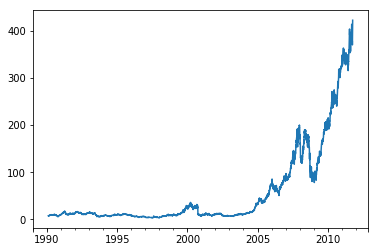

In [239]:
% matplotlib  inline
close_px['AAPL'].plot()  # AAPL每日价格

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


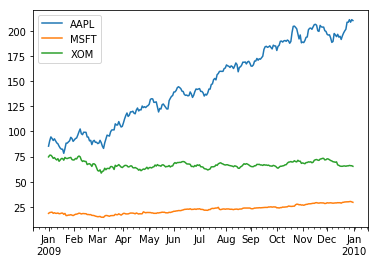

In [241]:
# 绘制2009年多个公司股票价格的数据
close_px.ix['2009'].plot()

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


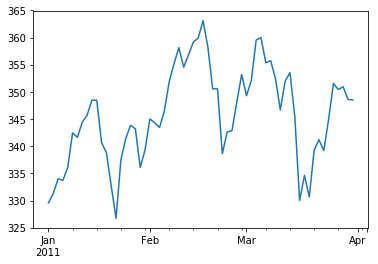

In [243]:
# 苹果公司在2011年1月到3月间的每日股价
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  
D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


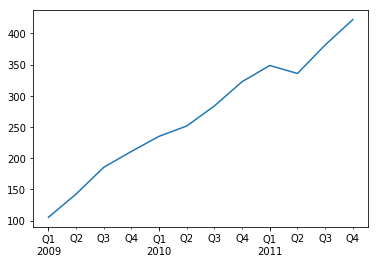

In [245]:
# 季度型频率的数据会用季度标记进行格式化
appl_q = close_px['AAPL'].resample('Q-DEC',fill_method='ffill')
appl_q.ix['2009':].plot()

# 移动窗口函数
在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一种常见于时间序列的数组变换，将它们称为移动窗口函数（moving window function）,其中，还包括那些窗口不定长的函数（如指数加权移动平均）。移动窗口函数也会自动排除缺失值

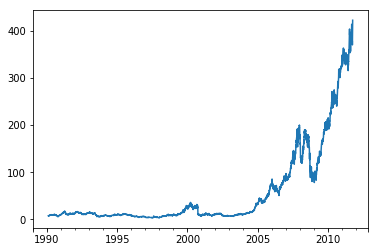

In [246]:
# rolling_mean：接受一个TimeSeries或DataFrame以及一个window(表示期数)
close_px.AAPL.plot()

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  """Entry point for launching an IPython kernel.


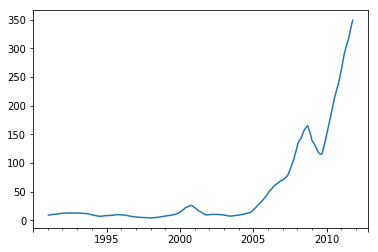

In [247]:
pd.rolling_mean(close_px.AAPL,250).plot() # 默认情况下，需要指定一个窗口里必须有多少个非NA的观测值

In [250]:
appl_std250 = pd.rolling_std(close_px.AAPL,250,min_periods=10)
appl_std250[:12]

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,min_periods=10,center=False).std()
  """Entry point for launching an IPython kernel.


1990-02-01         NaN
1990-02-02         NaN
1990-02-05         NaN
1990-02-06         NaN
1990-02-07         NaN
1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    0.148189
1990-02-15    0.141003
1990-02-16    0.135454
Freq: B, Name: AAPL, dtype: float64

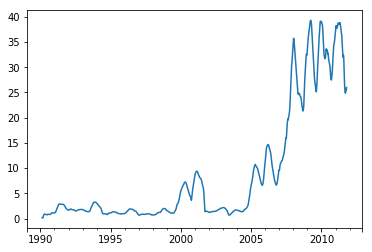

In [251]:
appl_std250.plot()  # 苹果公司250日每日回报标准差

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  after removing the cwd from sys.path.


D:\Python\anaconda\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


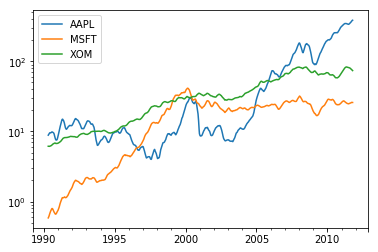

In [252]:
# 要计算扩展窗口平均（expanding window mean），可以将扩展窗口看做一个特殊的窗口，其长度与实践序列一样，但只需一期（或多期）即可计算一个值
# 通过rolling_mean 定义扩展平均
expanding_mean = lambda x: rolling_mean(x,len(x),min_periods=1)
pd.rolling_mean(close_px,60).plot(logy=True)  # 各股价60日均线（对数Y轴）

## 指数加权函数
使用固定大小窗口及相等权数观测值的办法是，定义一个衰减因子（decay factor）常量，以便使近期的观测值拥有更大的权数
- 衰减因子的定义方式很多，如使用时间间隔（span）,它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口（simple moving window）函数
- 由于指数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，它能“适应”更快的变化

In [253]:
import matplotlib.pyplot as plt

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,min_periods=50,center=False).mean()
  after removing the cwd from sys.path.
D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,adjust=True,ignore_na=False).mean()
  """


Text(0.5,1,'Exponentially-weighted MA')

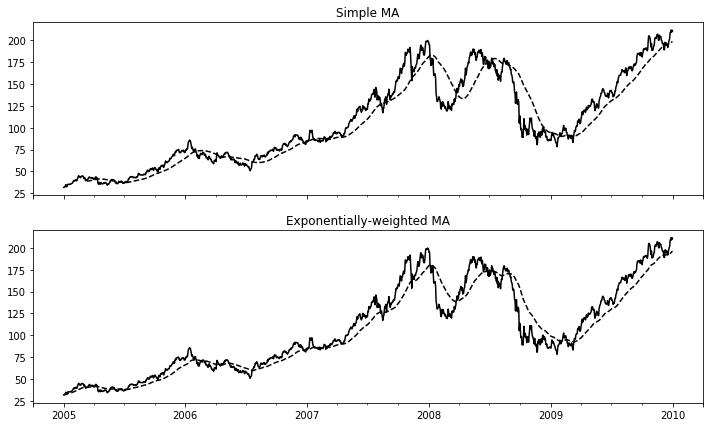

In [255]:
%matplotlib inline
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True,figsize=(12,7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = pd.rolling_mean(aapl_px,60,min_periods=50)
ewma60 = pd.ewma(aapl_px,span=60)

aapl_px.plot(style='k-',ax=axes[0])
ma60.plot(style='k--',ax=axes[0])
aapl_px.plot(style='k-',ax=axes[1])
ewma60.plot(style='k--',ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

## 二元移动窗口函数

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=125,min_periods=100).corr(other=<Series>)
  """


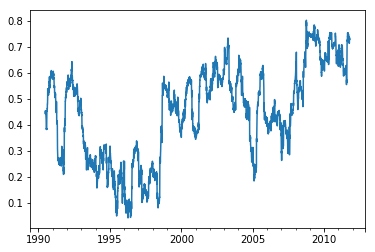

In [256]:
# 某只股票对某个参考指数（如标准普尔500指数）的相关系数
# 通过计算百分数变化并使用rolling_corr的方式得到该结果
spx_px = close_px_all['SPX']
spx_rets = spx_px/spx_px.shift(1)-1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL,spx_rets,125,min_periods=100)
corr.plot()

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=125,min_periods=100).corr(other=<Series>)
  


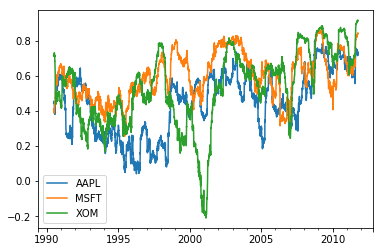

In [257]:
# 如果要一次性计算多只股票与标准普尔500指数的相关系数
corr = pd.rolling_corr(returns,spx_rets,125,min_periods=100)
corr.plot()

## 用户定义的移动窗口函数

In [268]:
# rolling_apply函数使你能够在移动窗口上应用自己设计的数组函数，唯一要求：该函数要能从数组的各个片段中产生单个值（即约简）
# 比如，rolling_quantile计算样本分位数时，可能对样本中特定值的百分等级感兴趣，可以用percentileofscore来达到这个目的
def percentileofscore(a, score, kind='rank'):
    a = np.array(a)
    n = len(a)

    if kind == 'rank':
        if not np.any(a == score):
            a = np.append(a, score)
            a_len = np.array(list(range(len(a))))
        else:
            a_len = np.array(list(range(len(a)))) + 1.0

        a = np.sort(a)
        idx = [a == score]
        pct = (np.mean(a_len[idx]) / n) * 100.0
        return pct

    elif kind == 'strict':
        return np.sum(a < score) / float(n) * 100
    elif kind == 'weak':
        return np.sum(a <= score) / float(n) * 100
    elif kind == 'mean':
        return (np.sum(a < score) + np.sum(a <= score)) * 50 / float(n)
    else:
        raise ValueError("kind can only be 'rank', 'strict', 'weak' or 'mean'")

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  
D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


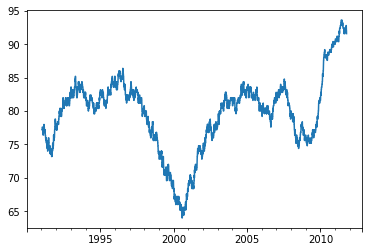

In [269]:
score_at_2percent = lambda x:percentileofscore(x,0.02)
result = pd.rolling_apply(returns.AAPL,250,score_at_2percent)
result.plot()

# 性能和内存使用方面的注意事项
对于每个数据点，其时间戳需要占用8字节的内存。由于pandas会尽量在多个时间序列之间共享索引，所以创建现有时间序列的视图不会占用更多内存

In [270]:
rng = pd.date_range('1/1/2000',periods=10000000,freq='10ms')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts[:5]

2000-01-01 00:00:00.000    0.268079
2000-01-01 00:00:00.010    0.333374
2000-01-01 00:00:00.020   -0.473221
2000-01-01 00:00:00.030    0.199182
2000-01-01 00:00:00.040    0.016043
Freq: 10L, dtype: float64

In [272]:
ts.resample('15min',how='ohlc')[:5]

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


,open,high,low,close
2000-01-01 00:00:00,0.268079,4.185414,-4.872265,-0.371660
2000-01-01 00:15:00,-0.286287,3.981232,-4.325316,-0.866245
2000-01-01 00:30:00,-0.184067,4.198914,-4.250623,-0.800792
2000-01-01 00:45:00,1.316344,4.550909,-3.930997,0.806287
2000-01-01 01:00:00,1.911346,4.381481,-4.326433,-1.605036


In [273]:
%timeit ts.resample('15min',how='ohlc')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


306 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [274]:
# 运行结果跟聚合结果的相对大小有一定关系，越高频率的聚合所韩飞的时间越多
rng = pd.date_range('1/1/2000',periods=10000000,freq='1s')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
%timeit ts.resample('15s',how='ohlc')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


469 ms ± 50.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
